In [163]:
#1.Importing Required libraries

#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pylab
import scipy.stats as stats
%matplotlib inline

# models for regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#Evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError


In [164]:
#2. Reading the csv
dataset = pd.read_csv('C:\\Users\\Pravinaben\\Desktop\\MON\\listings.csv')

C:\Users\Pravinaben\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [165]:
#3.1 Taking all the necessary Features
columns = ['id',
    'price',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'neighbourhood_cleansed',
    'number_of_reviews',
    'review_scores_rating',
    'availability_365',
    'bathrooms'   
]
dataset = pd.read_csv('C:\\Users\\Pravinaben\\Desktop\\MON\\listings.csv', usecols=columns)

In [166]:
#3.2 Basic Analysis of dataset

#order of pandas dataframe: Around 21k instances , 11 (independent variables) and 1 ( target variable)

dataset.shape

(21104, 12)

In [167]:
#3.3 first few instances of dataset
dataset.head(5)

,id,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,availability_365,number_of_reviews,review_scores_rating
0,2078,Le Plateau-Mont-Royal,House,Private room,2,1.0,1.0,1.0,$39.00,193,245,93.0
1,2843,Le Sud-Ouest,Serviced apartment,Private room,2,1.0,1.0,1.0,$30.00,232,125,88.0
2,14584,Le Plateau-Mont-Royal,Loft,Entire home/apt,4,1.0,1.0,1.0,$175.00,322,157,98.0
3,29059,Ville-Marie,Apartment,Entire home/apt,4,1.0,1.0,2.0,$94.00,292,293,93.0
4,29061,Ville-Marie,House,Entire home/apt,5,1.0,2.0,3.0,$145.00,334,49,92.0


In [168]:
#3.4 Types of data in the dataframe

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Data columns (total 12 columns):
id                        21104 non-null int64
neighbourhood_cleansed    21104 non-null object
property_type             21104 non-null object
room_type                 21104 non-null object
accommodates              21104 non-null int64
bathrooms                 21074 non-null float64
bedrooms                  21100 non-null float64
beds                      21077 non-null float64
price                     21104 non-null object
availability_365          21104 non-null int64
number_of_reviews         21104 non-null int64
review_scores_rating      16379 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.9+ MB


In [169]:
#3.5 Distribution of data

dataset.describe()

,id,accommodates,bathrooms,bedrooms,beds,availability_365,number_of_reviews,review_scores_rating
count,2.110400e+04,21104.000000,21074.000000,21100.000000,21077.000000,21104.000000,21104.000000,16379.000000
mean,2.114740e+07,3.579795,1.146745,1.427630,1.869004,102.961192,20.612301,93.541913
std,1.049004e+07,2.405151,0.500057,1.037121,1.452110,125.035151,41.218796,9.085038
min,2.078000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1.323859e+07,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,91.000000
50%,2.196378e+07,3.000000,1.000000,1.000000,1.000000,38.000000,5.000000,96.000000
75%,3.028807e+07,4.000000,1.000000,2.000000,2.000000,193.000000,20.000000,100.000000
max,3.667266e+07,18.000000,20.000000,20.000000,50.000000,365.000000,610.000000,100.000000


In [170]:
#3.6 No of listings
dataset.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False).head(10)


,id
neighbourhood_cleansed,
Le Plateau-Mont-Royal,6167
Ville-Marie,5529
Rosemont-La Petite-Patrie,1998
Côte-des-Neiges-Notre-Dame-de-Grâce,1432
Le Sud-Ouest,1293
Villeray-Saint-Michel-Parc-Extension,1146
Mercier-Hochelaga-Maisonneuve,1039
Verdun,510
Ahuntsic-Cartierville,341


<function matplotlib.pyplot.show(*args, **kw)>

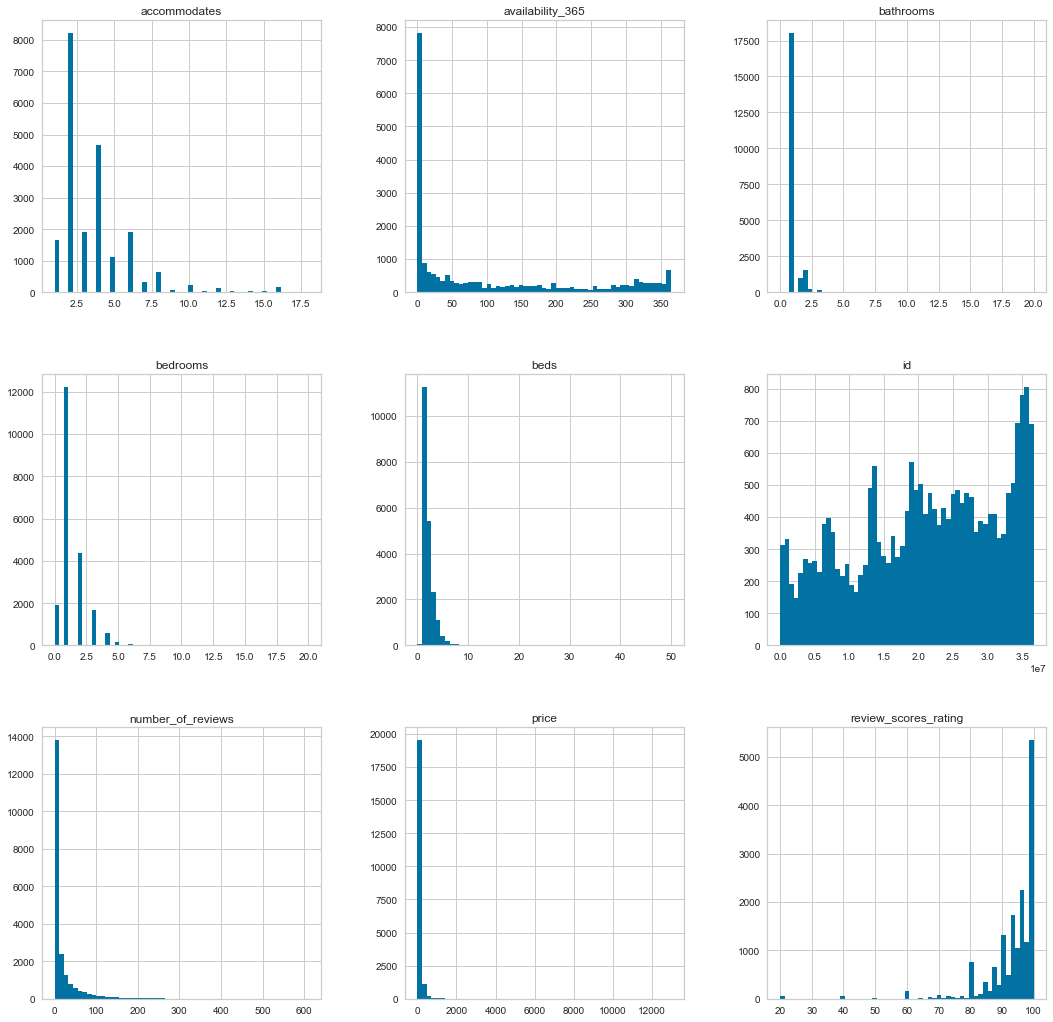

In [171]:
# 4. Exploratory Data Analysis 

#4.1 Histogram plot of data

# convert the price format
dataset['price'] = (dataset['price'].str.replace(r'[^-+\d.]', '').astype(float))

dataset.hist(bins=55, figsize= (18,18))
plt.show

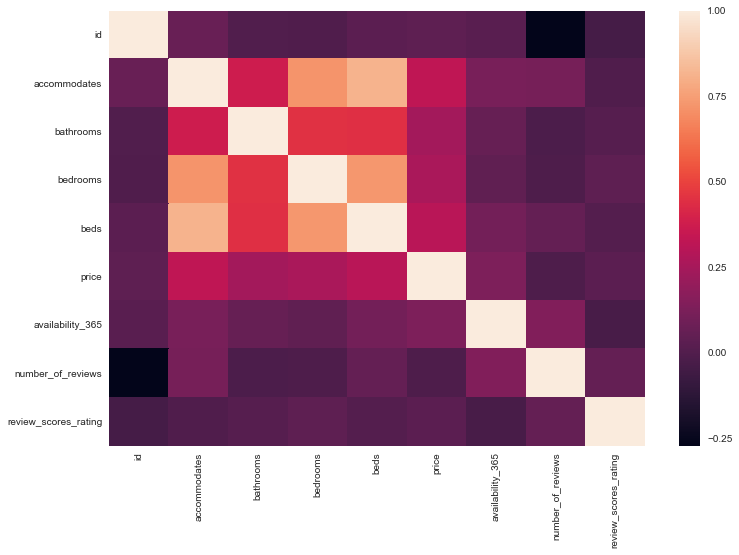

In [172]:
#4.2 Identifing correlation
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr());
plt.show()

In [72]:
#4.3 Price variable analysis

dataset['price'] = dataset['price'][(dataset['price'] != 0)]
dataset['price'].max()

12960.0

In [73]:
# Minimum Price
dataset['price'].min()

10.0

In [16]:
# Mean Price
dataset['price'].mean()

117.247180362051

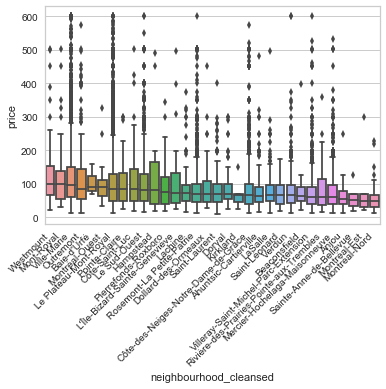

In [17]:
#4.4 Comparing the neighbourhood_cleansed vs price

sort_price = dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)]\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();


In [162]:
#4.5 Comparing the property_type vs price
sort_price = dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

AttributeError: 'DataFrame' object has no attribute 'price'

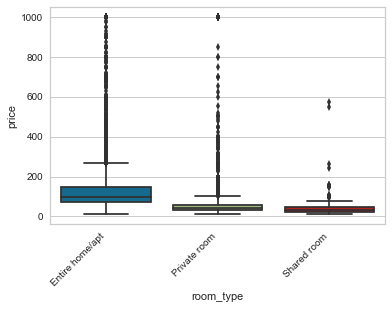

In [19]:
#4.6 Comparing the room_type vs price
sort_price = dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)]\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();


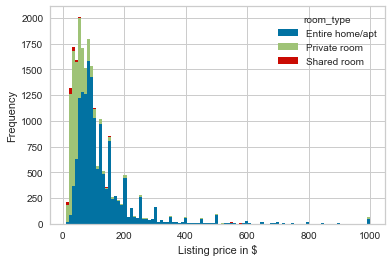

In [20]:
#4.6.1 Comparing the room_type vs price
dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)].pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100)
plt.xlabel('Listing price in $');


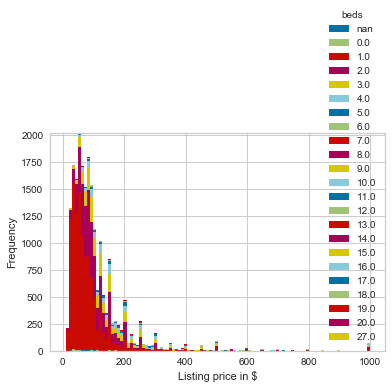

In [21]:
#4.7 Comparing the beds vs price
dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)].pivot(columns = 'beds',values = 'price').plot.hist(stacked = True,bins=100)
plt.xlabel('Listing price in $');

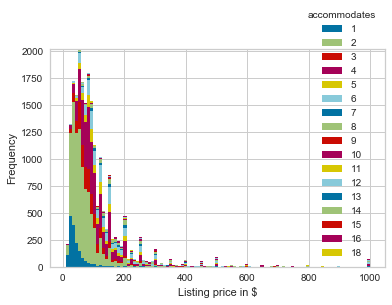

In [22]:
#4.8 Comparing the accommodates vs price
dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)].pivot(columns = 'accommodates',values = 'price').plot.hist(stacked = True,bins=100)
plt.xlabel('Listing price in $');

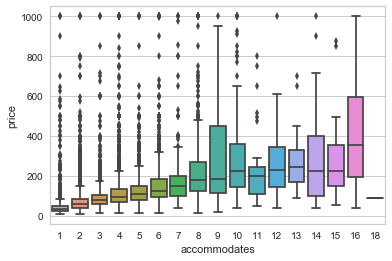

In [23]:
#4.8.1 Comparing the accommodates vs price
sns.boxplot(y='price', x='accommodates', data = dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)])
plt.show();

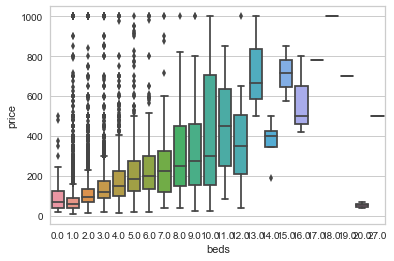

In [24]:
#4.9 Comparing the beds vs price
sns.boxplot(y='price', x='beds', data = dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)])
plt.show();

C:\Users\Pravinaben\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Pravinaben\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Skewness: 22.556308
Kurtosis: 903.892000


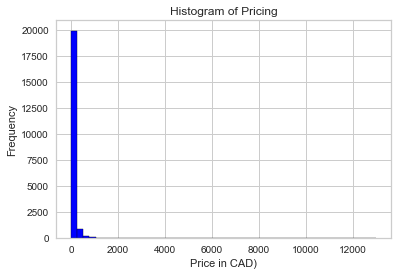

In [74]:
#5 Data Cleaning

#5.1 Data analysis and cleaning for Price variable

# histogram distribution of price
plt.hist(dataset['price'], color = 'blue', edgecolor = 'black',
         bins = int(50))

sns.distplot(dataset['price'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histogram of Pricing')
plt.xlabel('Price in CAD)')
plt.ylabel('Frequency')

print("Skewness: %f" % dataset['price'].skew())
print("Kurtosis: %f" % dataset['price'].kurt())



((array([-3.99138831, -3.77587696, -3.65797805, ...,  3.65797805,
          3.77587696,  3.99138831]),
  array([1.000e+01, 1.000e+01, 1.200e+01, ..., 1.296e+04,       nan,
               nan])),
 (nan, nan, nan))

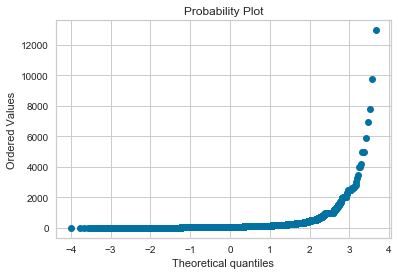

In [27]:
#Probability plot of price
stats.probplot(dataset['price'], plot=plt)

In [77]:
# Applying natural log to the 'price'
dataset['price_log'] = dataset['price'].apply(lambda x: math.log(x))

# Removing the price column since we have added the price_log column
dataset = dataset.drop('price', axis = 1)

C:\Users\Pravinaben\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Pravinaben\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Pravinaben\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


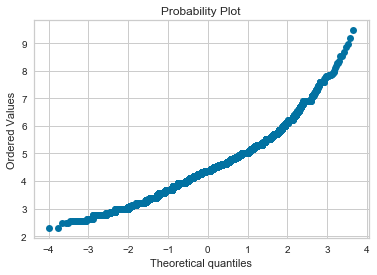

In [78]:
# Checking the distribution for price_log
stats.probplot(dataset['price_log'], dist="norm", plot=pylab)
pylab.show()

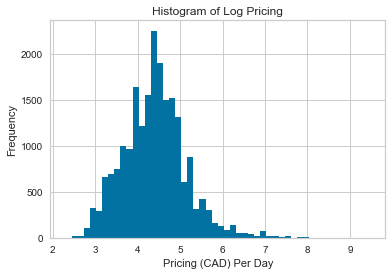

Skewness: 0.652819
Kurtosis: 1.683841


In [30]:
#visualize distribution of price_log (target variable)
plt.hist(dataset['price_log'], bins=50)
plt.title("Histogram of Log Pricing")
plt.xlabel("Pricing (CAD) Per Day")
plt.ylabel("Frequency")
plt.show()

print("Skewness: %f" % dataset['price_log'].skew())
print("Kurtosis: %f" % dataset['price_log'].kurt())

In [79]:
#5.2 Checking for null values

dataset.isnull().sum()

id                           0
neighbourhood_cleansed       0
property_type                0
room_type                    0
accommodates                 0
bathrooms                   30
bedrooms                     4
beds                        27
availability_365             0
number_of_reviews            0
review_scores_rating      4725
price_log                    2
dtype: int64

In [80]:
#5.3 Dropping the values of bathrooms bedrooms and beds since there are very few missing values
dataset = dataset.dropna(how='any', subset=['bedrooms','bathrooms','beds','price_log'])

In [81]:
#5.4 Replacing review score rating missing values with mean
dataset['review_scores_rating'].fillna((dataset['review_scores_rating'].mean()), inplace=True)

In [82]:
#5.5 Rechecking for null values
dataset.isnull().sum()

id                        0
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
availability_365          0
number_of_reviews         0
review_scores_rating      0
price_log                 0
dtype: int64

In [83]:
#5.6 Encoding the categorical variables
encoding = dataset.copy()
encoding = pd.get_dummies(encoding, columns=['room_type', 'neighbourhood_cleansed', 'property_type'])

print(encoding.head())
print ('Number of Columns:', len(encoding.columns))

# move target predictor 'price' to the end of the dataframe
cols = list(encoding.columns.values)
idx = cols.index('price_log')
rearrange_cols = cols[:idx] + cols[idx+1:] + [cols[idx]]
dataset = encoding[rearrange_cols]

      id  accommodates  bathrooms  bedrooms  beds  availability_365  \
0   2078             2        1.0       1.0   1.0               193   
1   2843             2        1.0       1.0   1.0               232   
2  14584             4        1.0       1.0   1.0               322   
3  29059             4        1.0       1.0   2.0               292   
4  29061             5        1.0       2.0   3.0               334   

   number_of_reviews  review_scores_rating  price_log  \
0                245                  93.0   3.663562   
1                125                  88.0   3.401197   
2                157                  98.0   5.164786   
3                293                  93.0   4.543295   
4                 49                  92.0   4.976734   

   room_type_Entire home/apt  ...  property_type_Houseboat  \
0                          0  ...                        0   
1                          0  ...                        0   
2                          1  ...           

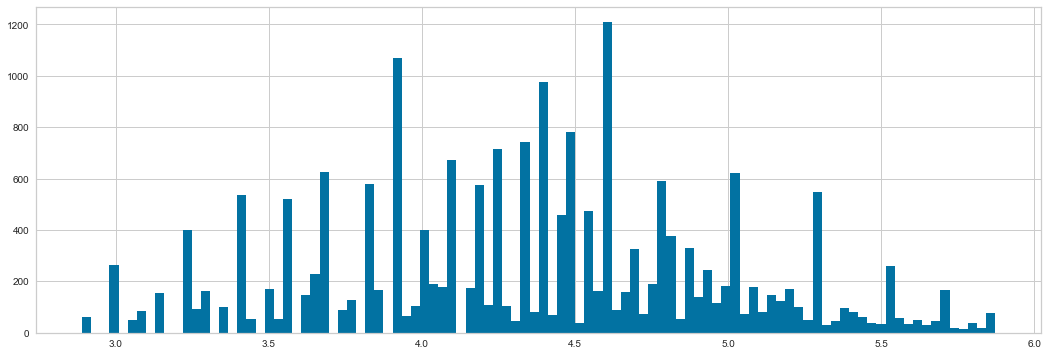

(20219, 1)

In [84]:
#5.7 Fixing outliers
# Outlier : we define outlier as values which are two standard deviations away from the mean.
# Using Z-Score method

def reject_outliers(price_log):
    m = np.median(dataset['price_log'])
    sd = np.std(dataset['price_log'])
    filtered= [a for a in (dataset['price_log']) if (m - 2 * sd < a < m + 2 * sd)]
    return filtered

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] =18.0
figure_size[1] = 6.0

filtered = reject_outliers('price_log')
plt.hist(filtered, 100)
figure_size[0]=17.0
figure_size[1]=9.0
plt.show()

data_price_log = pd.DataFrame(filtered)
data_price_log.shape

In [85]:
#distribution of price_log variable
dataset['price_log'].describe()

count    21052.000000
mean         4.403857
std          0.746461
min          2.302585
25%          3.912023
50%          4.382027
75%          4.828314
max          9.469623
Name: price_log, dtype: float64

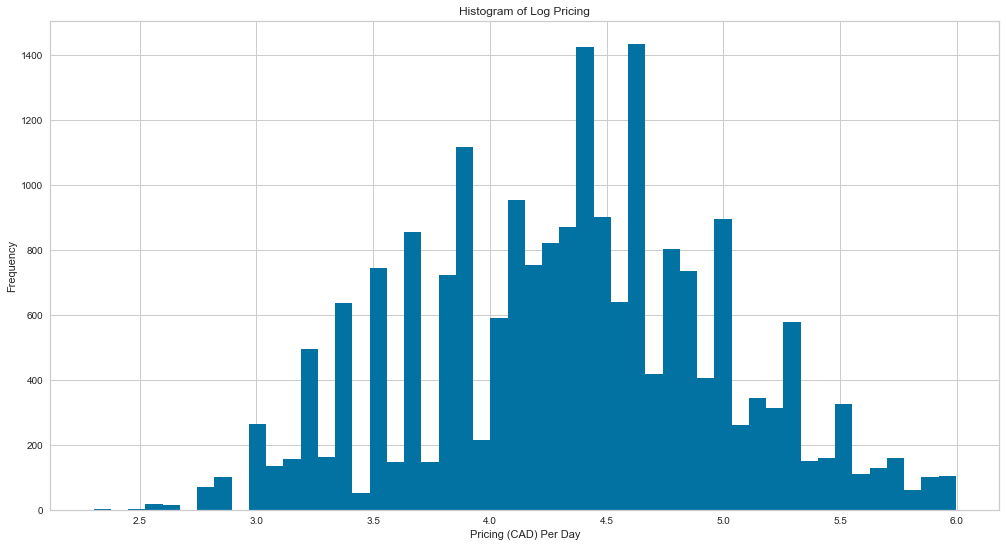

(20501, 76)

In [86]:
#5.8 Removing Outliers

#Outlier for price_log column would be : mean + 2 * sd = 4.4 + (2 x 0.7) = 6 above

newdataset = dataset[dataset['price_log']<6]

plt.hist(newdataset['price_log'], bins=50)
plt.title("Histogram of Log Pricing")
plt.xlabel("Pricing (CAD) Per Day")
plt.ylabel("Frequency")
plt.show()

newdataset.shape

In [87]:
#5.9 Correlation of variables with target variable:

corr_mat = newdataset.corr()
corr_mat['price_log'].sort_values(ascending=False)

price_log                                                          1.000000
room_type_Entire home/apt                                          0.582242
accommodates                                                       0.536265
beds                                                               0.456942
bedrooms                                                           0.413456
neighbourhood_cleansed_Ville-Marie                                 0.163347
availability_365                                                   0.152498
bathrooms                                                          0.133105
property_type_Condominium                                          0.107136
property_type_Loft                                                 0.100125
property_type_Serviced apartment                                   0.098102
number_of_reviews                                                  0.080634
neighbourhood_cleansed_Le Plateau-Mont-Royal                       0.044822
property_typ

In [88]:
newdataset.drop('id', axis = 1)

,accommodates,bathrooms,bedrooms,beds,availability_365,number_of_reviews,review_scores_rating,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,...,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,price_log
0,2,1.0,1.0,1.0,193,245,93.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,3.663562
1,2,1.0,1.0,1.0,232,125,88.000000,0,1,0,...,0,0,0,0,1,0,0,0,0,3.401197
2,4,1.0,1.0,1.0,322,157,98.000000,1,0,0,...,1,0,0,0,0,0,0,0,0,5.164786
3,4,1.0,1.0,2.0,292,293,93.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,4.543295
4,5,1.0,2.0,3.0,334,49,92.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,4.976734
5,2,1.0,1.0,1.0,244,131,89.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,3.401197
6,5,1.0,2.0,3.0,252,4,93.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,4.934474
7,2,1.0,1.0,1.0,239,34,99.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,4.787492
8,1,1.0,3.0,1.0,333,12,87.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,3.828641
9,4,1.0,2.0,3.0,259,351,93.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,4.605170


In [177]:
#6 Modelling 
#Training and Testing data

X = newdataset.iloc[: , 1:-1].values
y = newdataset.iloc[: , -1].values

In [178]:
#30 percent of the data is allocated for testing
# random state is set not to introduce sampling bias

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [179]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(14350, 74)
(14350,)
(6151, 74)
(6151,)


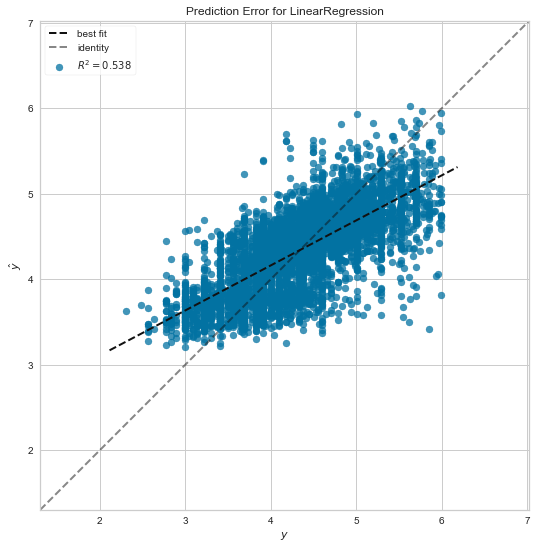

In [103]:
#6.1 Linear Regression

# Instantiate the linear model and visualizer

lm = LinearRegression()
visualizer = PredictionError(lm)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test) 
visualizer.poof() 

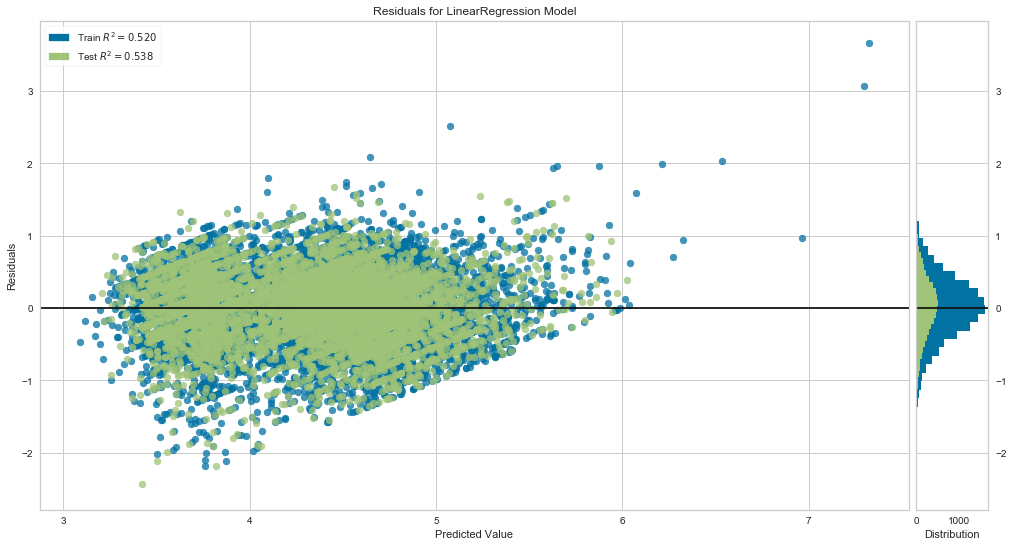

In [104]:
# Instantiate visualizer
visualizer = ResidualsPlot(lm)

# Fit the training data to the model
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
visualizer.poof() 

In [105]:
#Evaluating the Model
from sklearn import metrics
lm = LinearRegression()

#Train/fit lm on the training data
lm.fit(X_train,y_train)
lm.score(X_test,y_test)
predictions = lm.predict( X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Coefficient of Determination:',metrics.r2_score(y_test, predictions))
print(lm.score(X_test, y_test))
a1 = y_test.ravel()
b1 = predictions.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();

MAE: 0.3471407114152832
MSE: 0.20201163734592703
RMSE: 0.4494570472758515
variance: 0.5376198234970468
0.5376198234970468
      Actual  Predicted
0   5.855072   4.913738
1   4.553877   4.653816
2   4.094345   3.907751
3   3.401197   3.740622
4   4.276666   4.380818
5   4.499810   4.383582
6   3.610918   4.352306
7   4.499810   4.671262
8   5.293305   4.447974
9   5.129899   4.894703
10  3.912023   3.860715
11  4.934474   4.697241
12  4.248495   4.428812
13  3.610918   3.910122
14  4.828314   4.768890
15  5.521461   4.787944
16  4.584967   4.793336
17  4.356709   4.077844
18  4.382027   4.589578
19  3.931826   3.739603


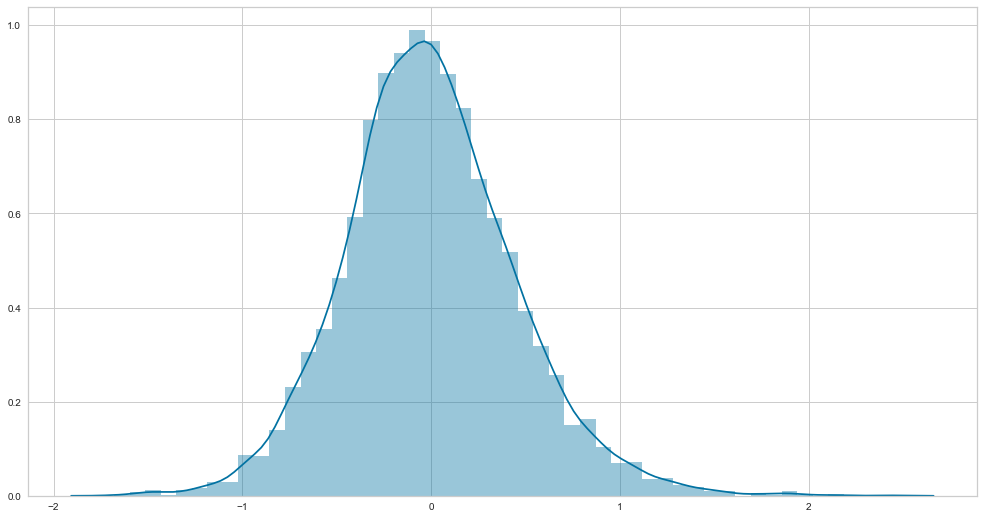

In [107]:
#Plotting Residuals
sns.distplot((y_test-predictions),bins=50);

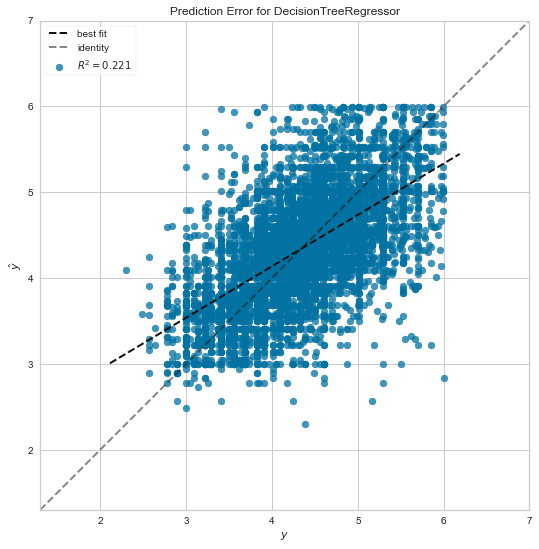

In [109]:
#6.2 DecisionTree Regressor

# Instantiate the decision tree regressor model and visualizer
dt = DecisionTreeRegressor(random_state=0)
visualizer = PredictionError(dt)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
g = visualizer.poof() 

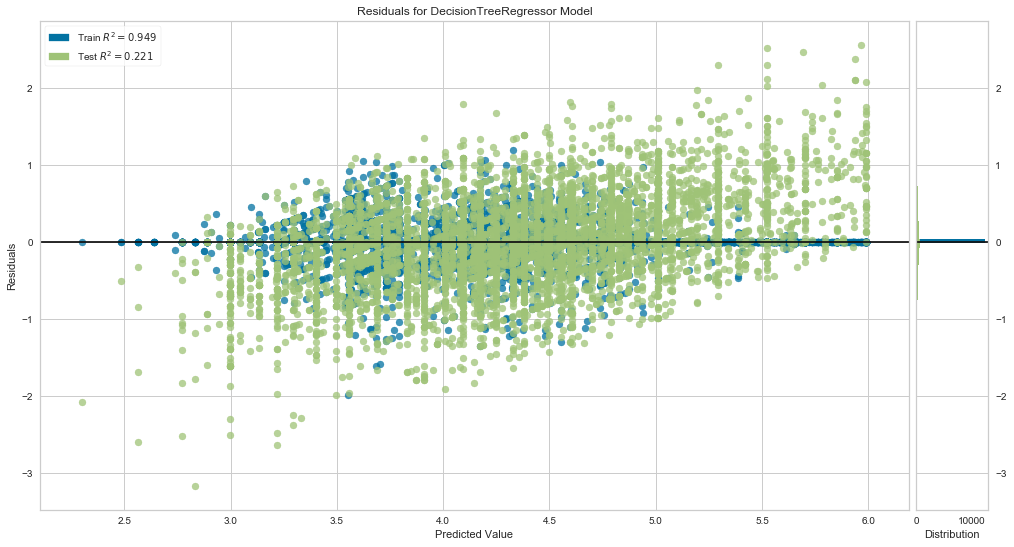

In [110]:
# Instantiate the visualizer
visualizer = ResidualsPlot(dt)

# Fit the training data to the model
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
visualizer.poof()           

In [111]:
#Evaluating the Decision Tree Regressor Model
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(X_train,y_train)
dt_reg.score(X_test,y_test)
dtr_pred= dt_reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dtr_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dtr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,dtr_pred))) 
print('Coefficient of Determination:',metrics.r2_score(y_test, dtr_pred))

a1 = y_test.ravel()
b1 = dtr_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();


Mean Absolute Error: 0.4421603620569738
Mean Squared Error: 0.3402545361699368
Root Mean Squared Error: 0.5833134116150055
variance: 0.2211985677796503
      Actual  Predicted
0   5.855072   5.796058
1   4.553877   4.418841
2   4.094345   3.448852
3   3.401197   4.077537
4   4.276666   4.325088
5   4.499810   3.828641
6   3.610918   4.619763
7   4.499810   4.382027
8   5.293305   5.991465
9   5.129899   5.164786
10  3.912023   4.382027
11  4.934474   5.480639
12  4.248495   4.454347
13  3.610918   4.290459
14  4.828314   4.867534
15  5.521461   4.174387
16  4.584967   4.779123
17  4.356709   4.553877
18  4.382027   4.828314
19  3.931826   3.401197


In [113]:
# Calculate mean absolute percentage error (MAPE)
errors = abs(dtr_pred - y_test)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 89.57 %.


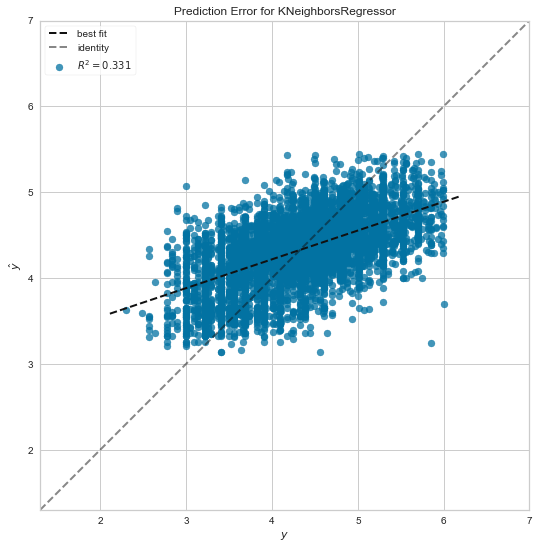

In [115]:
#6.3 KNN Regressor

# Instantiate the knn regressor model and visualizer
kn = KNeighborsRegressor(n_neighbors=10)
visualizer = PredictionError(kn)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
g = visualizer.poof() 

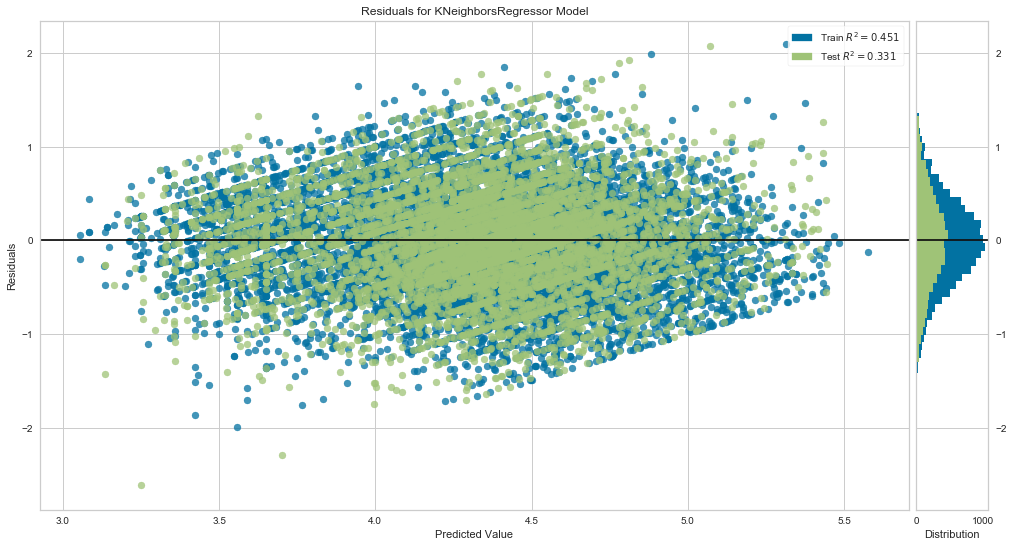

In [116]:
# Instantiate the visualizer
visualizer = ResidualsPlot(kn)

# Fit the training data to the model
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
visualizer.poof()           

In [117]:
#Evaluating the KNN Regressor Model

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)
knn_pred= knn.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knn_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn_pred))) 
print ('Coefficient of Determination:',metrics.r2_score(y_test, knn_pred))

a1 = y_test.ravel()
b1 = knn_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();

Mean Absolute Error: 0.42617254192126436
Mean Squared Error: 0.2923055070894922
Root Mean Squared Error: 0.5406528526600893
variance: 0.330948089246059
      Actual  Predicted
0   5.855072   4.873812
1   4.553877   4.285223
2   4.094345   3.529846
3   3.401197   3.964794
4   4.276666   4.313525
5   4.499810   4.221063
6   3.610918   4.607154
7   4.499810   4.710172
8   5.293305   4.303824
9   5.129899   4.467458
10  3.912023   4.361054
11  4.934474   4.705633
12  4.248495   4.045417
13  3.610918   4.555935
14  4.828314   4.744330
15  5.521461   4.695916
16  4.584967   4.716412
17  4.356709   4.128210
18  4.382027   4.154269
19  3.931826   4.182050


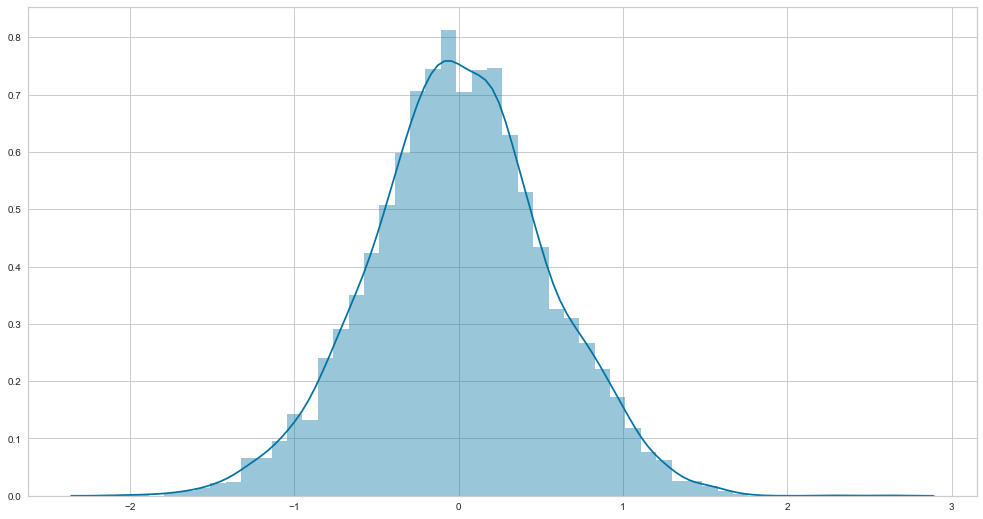

In [69]:
#Plotting Residuals
sns.distplot((y_test-knn_pred),bins=50);

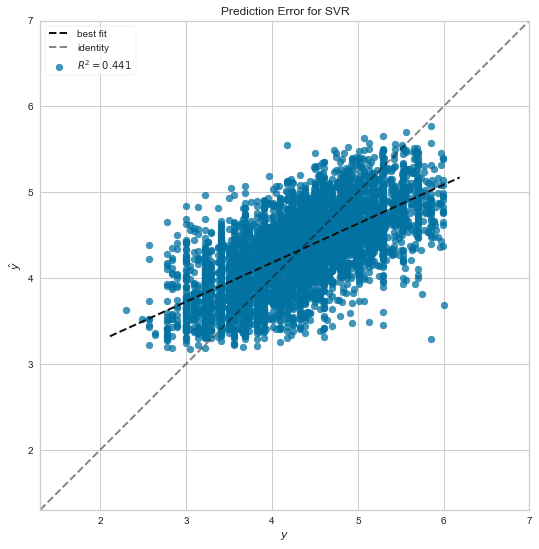

In [119]:
#6.4 SVM Regression

# Instantiate the svr model and visualizer
svr = SVR(gamma='auto')
visualizer = PredictionError(svr)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
g = visualizer.poof()            

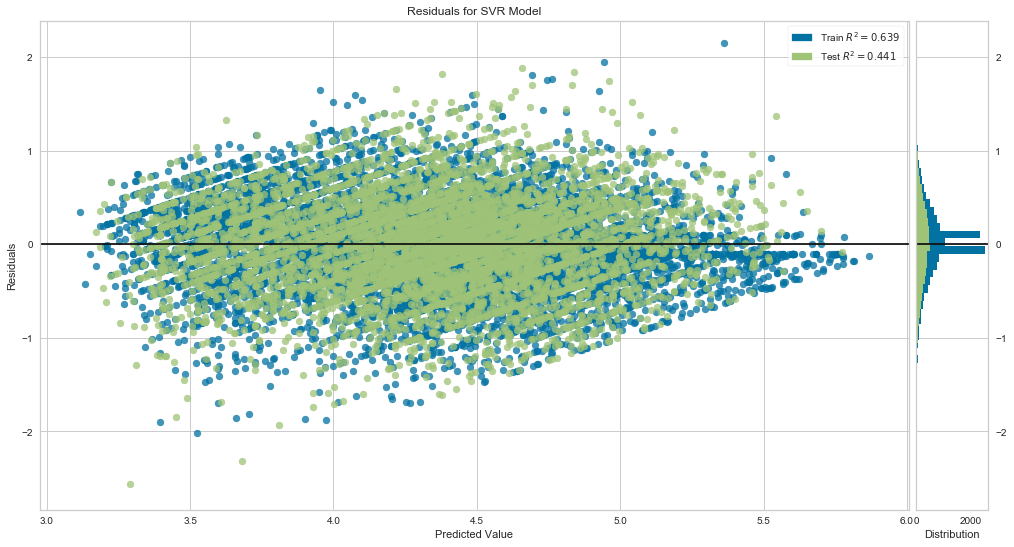

In [120]:
# Instantiate the visualizer
visualizer = ResidualsPlot(svr)

# Fit the training data to the model
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
visualizer.poof() 

In [121]:
#Evaluate the SVM Regressor
svr_reg = SVR(gamma='auto')
svr_reg.fit(X_train, y_train)
svr_pred= svr_reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svr_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print ('Coefficient of Determination:',metrics.r2_score(y_test, svr_pred))

a1 = y_test.ravel()
b1 = svr_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();

Mean Absolute Error: 0.38604173169912465
Mean Squared Error: 0.2443872659829381
Root Mean Squared Error: 0.49435540452486015
variance: 0.44062714076831666
      Actual  Predicted
0   5.855072   4.870401
1   4.553877   4.173498
2   4.094345   3.747557
3   3.401197   3.755990
4   4.276666   4.282114
5   4.499810   4.347855
6   3.610918   4.213845
7   4.499810   4.506866
8   5.293305   4.485104
9   5.129899   4.373920
10  3.912023   3.915586
11  4.934474   4.708553
12  4.248495   3.985521
13  3.610918   4.295458
14  4.828314   4.599557
15  5.521461   4.665991
16  4.584967   4.845876
17  4.356709   4.034329
18  4.382027   4.529775
19  3.931826   3.905168


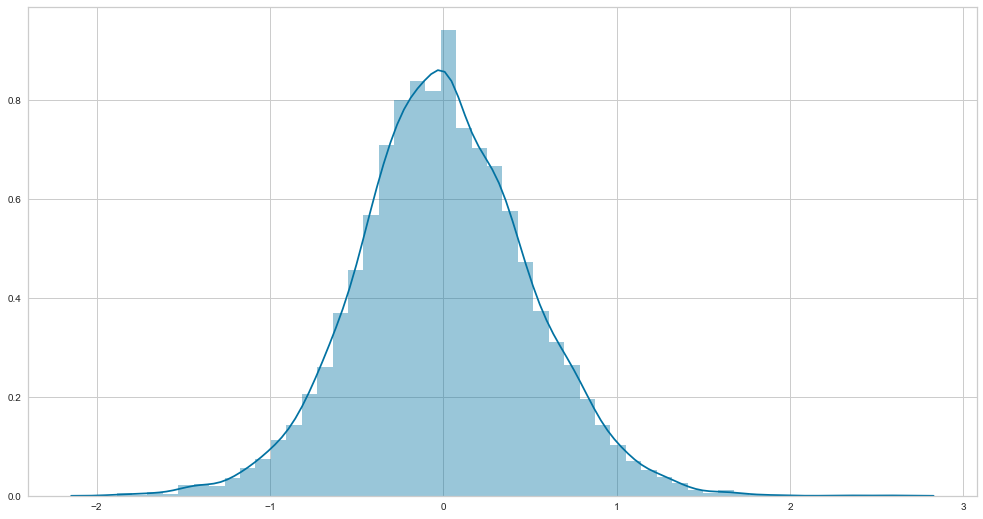

In [76]:
#Plotting Residuals
plt.sca
sns.distplot((y_test-svr_pred),bins=50);

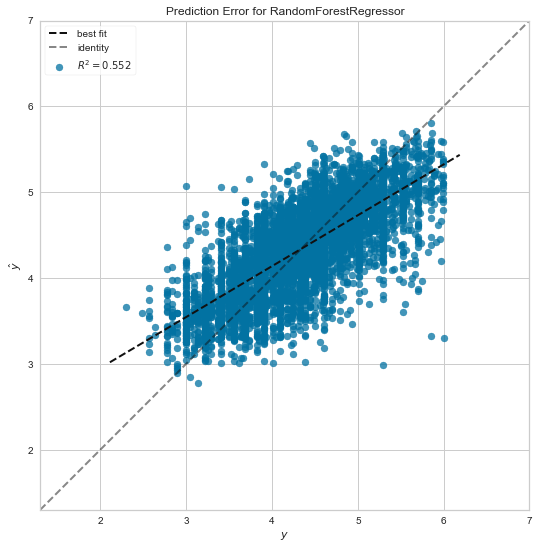

In [78]:
#6.5 Random Forest Regression

# Instantiate the Random Forest Regression model and visualizer
rn = RandomForestRegressor(random_state=0,n_estimators=100)

visualizer = PredictionError(rn)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
g = visualizer.poof()

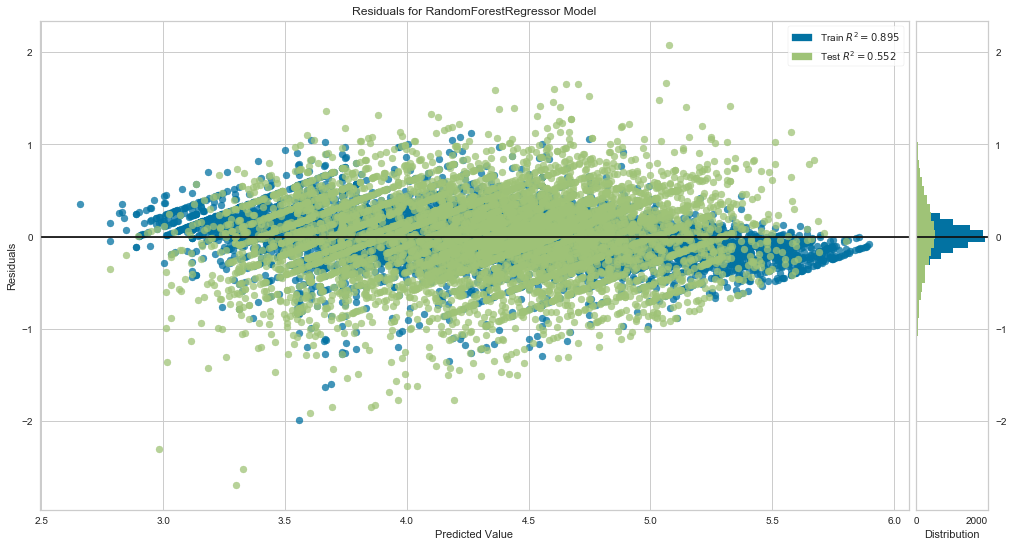

In [79]:
#Instantiate the visualizer
visualizer = ResidualsPlot(rn)

# Fit the training data to the model
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
visualizer.poof()  

In [80]:
#Evaluating the Model
regr = RandomForestRegressor(random_state=0,n_estimators=100)
regr.fit(X_train,y_train)
rfr_pred= regr.predict(X_test)
print('MAE is ' , metrics.mean_absolute_error(rfr_pred,y_test))
print ('Coefficient of Determination:',metrics.r2_score(y_test, rfr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred))) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfr_pred))

a1 = y_test.ravel()
b1 = rfr_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();

MAE is  0.33864798192778517
variance: 0.5523990507952058
Root Mean Squared Error: 0.44221563205419245
Mean Squared Error: 0.19555466523308893
      Actual  Predicted
0   5.855072   5.500489
1   4.553877   4.538150
2   4.094345   3.765531
3   3.401197   3.749079
4   4.276666   4.325088
5   4.499810   4.258385
6   3.610918   4.582330
7   4.499810   4.439576
8   5.293305   4.877691
9   5.129899   4.590483
10  3.912023   3.807678
11  4.934474   5.273979
12  4.248495   4.695987
13  3.610918   3.988805
14  4.828314   4.776520
15  5.521461   4.870984
16  4.584967   4.886310
17  4.356709   4.226966
18  4.382027   4.623901
19  3.931826   3.669725


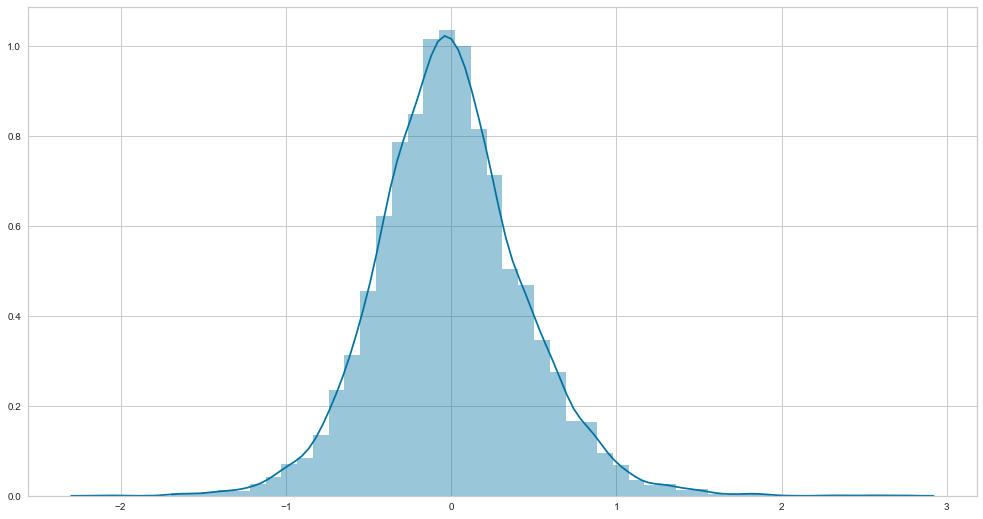

In [82]:
#Plotting Residuals
plt.sca
sns.distplot((y_test-rfr_pred),bins=50);

In [122]:
#6.6 To Summarize Mean Squared Error For All the Models
mse=[]
Regressors=['Linear Regression','Decision Tree','KNN','SVM','Random Forest Regressor']
models=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=10),SVR(gamma='auto'),RandomForestRegressor(random_state=0,n_estimators=100)]
for i in models:
    model = i
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse.append(metrics.mean_squared_error(y_test,y_pred))
models_dataframe=pd.DataFrame(mse,index=Regressors)   
models_dataframe.columns=['MSE']
models_dataframe

,MSE
Linear Regression,0.202012
Decision Tree,0.343124
KNN,0.292306
SVM,0.244387
Random Forest Regressor,0.195555


In [180]:
#6.7 To Summarize variance For All the Models
var=[]
Regressors=['Linear Regression','Decision Tree','KNN','SVM','Random Forest Regressor']
models=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=10),SVR(gamma='auto'),RandomForestRegressor(random_state=0,n_estimators=100)]
for i in models:
    model = i
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    var.append(metrics.r2_score(y_test,y_pred))
models_dataframe=pd.DataFrame(var,index=Regressors)   
models_dataframe.columns=['R2 score']
models_dataframe

,R2 score
Linear Regression,0.537620
Decision Tree,0.223208
KNN,0.330948
SVM,0.440627
Random Forest Regressor,0.552399


In [88]:
#7 Cross Validation

#7.1 Cross Validation for linear Regression Model
X = newdataset.iloc[: , : -1].values
y = newdataset.iloc[: , -1].values

In [137]:
#7.1 Cross validation for Linear regression
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

scores = cross_val_score(lm, X, y, cv= 8)
print('Accuracy of every fold in cross validation:', abs(scores))
print('Mean of the validation score:', abs(scores.mean()))
Mscores = cross_val_score(lm, X, y, cv=8, scoring='neg_mean_squared_error')
print('MSE of every fold in cross validation:', -Mscores)
print('MEan of MSE:', -Mscores.mean())

Accuracy of every fold in cross validation: [0.541273   0.5552823  0.49207933 0.49876206 0.54336625 0.44165461
 0.54723699 0.45754093]
Mean of the validation score: 0.509649433214036
MSE of every fold in cross validation: [0.1656275  0.19582438 0.21754662 0.21734937 0.22528553 0.22479446
 0.19408048 0.21141776]
MEan of MSE: 0.20649076333079674


In [139]:
#7.2 Cross validation for Random Forest

rf = RandomForestRegressor(random_state=0,n_estimators=100)

scores = cross_val_score(rf, X, y, cv= 8)
print('Accuracy of every fold in cross validation:', abs(scores))
print('Mean of the validation score:', abs(scores.mean()))
Mscores = cross_val_score(rf, X, y, cv=8, scoring='neg_mean_squared_error')
print('MSE of every fold in cross validation:', -Mscores)
print('MEan of MSE:', -Mscores.mean())

Accuracy of every fold in cross validation: [0.49622187 0.54451644 0.49740895 0.50407984 0.57116561 0.44638317
 0.52863207 0.4512711 ]
Mean of the validation score: 0.5049598821910983
MSE of every fold in cross validation: [0.18189362 0.20056495 0.2152639  0.21504345 0.21157039 0.2228907
 0.20205563 0.21386136]
MEan of MSE: 0.20789300058643437


In [140]:
#7.3 Cross validation for KNN

kn = KNeighborsRegressor(n_neighbors=10)

scores = cross_val_score(kn, X, y, cv= 8)
print('Accuracy of every fold in cross validation:', abs(scores))
print('Mean of the validation score:', abs(scores.mean()))
Mscores = cross_val_score(kn, X, y, cv=8, scoring='neg_mean_squared_error')
print('MSE of every fold in cross validation:', -Mscores)
print('MEan of MSE:', -Mscores.mean())

Accuracy of every fold in cross validation: [0.23424189 0.41427133 0.32652453 0.32164137 0.34742112 0.25896711
 0.32653728 0.23924856]
Mean of the validation score: 0.3086066497661693
MSE of every fold in cross validation: [0.27648385 0.25791632 0.2884551  0.29415335 0.32195732 0.29834596
 0.28868518 0.29649494]
MEan of MSE: 0.29031150090585645


In [141]:
#7.4 Cross validation for Decision tree

dt = DecisionTreeRegressor(random_state=10)

scores = cross_val_score(dt, X, y, cv= 8)
print('Accuracy of every fold in cross validation:', abs(scores))
print('Mean of the validation score:', abs(scores.mean()))
Mscores = cross_val_score(dt, X, y, cv=8, scoring='neg_mean_squared_error')
print('MSE of every fold in cross validation:', -Mscores)
print('MEan of MSE:', -Mscores.mean())

Accuracy of every fold in cross validation: [0.11881243 0.26581176 0.20538147 0.15972736 0.23813867 0.05930223
 0.11035235 0.07741884]
Mean of the validation score: 0.13501342888564677
MSE of every fold in cross validation: [0.31816069 0.32328813 0.34034167 0.36436334 0.37587308 0.37873269
 0.38135457 0.41991275]
MEan of MSE: 0.36275336558771537


In [142]:
#7.5 Cross validation for SVR

svr = SVR(gamma='auto')

scores = cross_val_score(svr, X, y, cv= 8)
print('Accuracy of every fold in cross validation:', abs(scores))
print('Mean of the validation score:', abs(scores.mean()))
Mscores = cross_val_score(svr, X, y, cv=8, scoring='neg_mean_squared_error')
print('MSE of every fold in cross validation:', -Mscores)
print('MEan of MSE:', -Mscores.mean())

Accuracy of every fold in cross validation: [0.37642864 0.50832369 0.42242273 0.41391611 0.45595343 0.3736427
 0.46118163 0.38469612]
Mean of the validation score: 0.42457063014450824
MSE of every fold in cross validation: [0.22514604 0.21650186 0.24738111 0.25414071 0.26841165 0.25217662
 0.2309688  0.23980827]
MEan of MSE: 0.24181688230041232


In [173]:
# 8.1  Analysis for checking hypothesis
#taking only 4 variables

X = newdataset[[ 
    'room_type_Entire home/apt',
    'accommodates',
    'beds', 'bedrooms']]
y = newdataset['price_log']

In [154]:
#8.2 Training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [175]:
print(X_train.shape)

(14350, 4)


In [150]:
#8.3 Linear Regression
#Evaluating the Model
from sklearn import metrics
lm = LinearRegression()

#Train/fit lm on the training data
lm.fit(X_train,y_train)
lm.score(X_test,y_test)
predictions = lm.predict( X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Coefficient of Determination:',metrics.r2_score(y_test, predictions))
print(lm.score(X_test, y_test))
a1 = y_test.ravel()
b1 = predictions.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();

MAE: 0.37925473947695626
MSE: 0.23711599410554182
RMSE: 0.48694557612277556
variance: 0.45727020162482657
0.4572702016248266
      Actual  Predicted
0   5.855072   4.389727
1   4.553877   4.380922
2   4.094345   3.748783
3   3.401197   3.748783
4   4.276666   4.389727
5   4.499810   4.389727
6   3.610918   4.389727
7   4.499810   4.291067
8   5.293305   4.366234
9   5.129899   5.002831
10  3.912023   3.748783
11  4.934474   4.621111
12  4.248495   4.464894
13  3.610918   3.748783
14  4.828314   4.389727
15  5.521461   4.777329
16  4.584967   4.771446
17  4.356709   4.282262
18  4.382027   4.389727
19  3.931826   3.748783


In [155]:
#8.4 random forest
#Evaluating the Model
regr = RandomForestRegressor(random_state=0,n_estimators=100)
regr.fit(X_train,y_train)
rfr_pred= regr.predict(X_test)
print('MAE is ' , metrics.mean_absolute_error(rfr_pred,y_test))
print ('Coefficient of Determination:',metrics.r2_score(y_test, rfr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred))) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfr_pred))

a1 = y_test.ravel()
b1 = rfr_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();

MAE is  0.3759661171116998
variance: 0.4622530578709334
Root Mean Squared Error: 0.48470507381875266
Mean Squared Error: 0.23493900858564248
      Actual  Predicted
0   5.855072   4.396290
1   4.553877   4.303880
2   4.094345   3.748059
3   3.401197   3.748059
4   4.276666   4.396290
5   4.499810   4.396290
6   3.610918   4.396290
7   4.499810   4.233323
8   5.293305   4.370981
9   5.129899   4.951033
10  3.912023   3.748059
11  4.934474   4.661425
12  4.248495   4.480894
13  3.610918   3.748059
14  4.828314   4.396290
15  5.521461   4.865823
16  4.584967   4.849761
17  4.356709   4.102841
18  4.382027   4.396290
19  3.931826   3.748059


In [160]:
#8.4 Cross validation for Random Forest
rf = RandomForestRegressor(random_state=0,n_estimators=100)

scores = cross_val_score(rf, X, y, cv= 15)
print('Accuracy of every fold in cross validation:', abs(scores))
print('Mean of the validation score:', abs(scores.mean()))
Mscores = cross_val_score(rf, X, y, cv=15, scoring='neg_mean_squared_error')
print('MSE of every fold in cross validation:', -Mscores)
print('MEan of MSE:', -Mscores.mean())

Accuracy of every fold in cross validation: [0.3772647  0.50825255 0.46290356 0.52691106 0.43964146 0.46216401
 0.44624371 0.40154996 0.5091735  0.45856015 0.30534585 0.42943197
 0.53280541 0.42354479 0.39510341]
Mean of the validation score: 0.4452597393303206
MSE of every fold in cross validation: [0.21245004 0.18656929 0.20607863 0.24069602 0.23305446 0.2365518
 0.22599977 0.27702896 0.25028158 0.22459061 0.28312606 0.22846859
 0.2063492  0.23000578 0.22755406]
MEan of MSE: 0.23125365639291853


In [161]:
#8.5 Cross validation for Linear Regression

lm = LinearRegression()

scores = cross_val_score(lm, X, y, cv= 15)
print('Accuracy of every fold in cross validation:', abs(scores))
print('Mean of the validation score:', abs(scores.mean()))
Mscores = cross_val_score(lm, X, y, cv=15, scoring='neg_mean_squared_error')
print('MSE of every fold in cross validation:', -Mscores)
print('MEan of MSE:', -Mscores.mean())

Accuracy of every fold in cross validation: [0.37918829 0.50532231 0.45802735 0.51200261 0.42054653 0.44833803
 0.43437954 0.37143517 0.49497771 0.44590961 0.31317018 0.41823587
 0.51037608 0.38472555 0.40128497]
Mean of the validation score: 0.433194654350315
MSE of every fold in cross validation: [0.2117938  0.18768102 0.20794958 0.24828108 0.24099608 0.24263276
 0.23084179 0.29096942 0.25752028 0.22983808 0.27993703 0.23295176
 0.21625573 0.24549467 0.22522864]
MEan of MSE: 0.23655811469875593
